# 1. What is a Histogram?

- A histogram is a plot of the frequency distribution of numeric array by splitting it to small equal-sized bins.

## 2. How to plot a basic histogram in python?

- The pyplot.hist() in matplotlib lets you draw the histogram. It required the array as the required input and you can specify the number of bins needed.

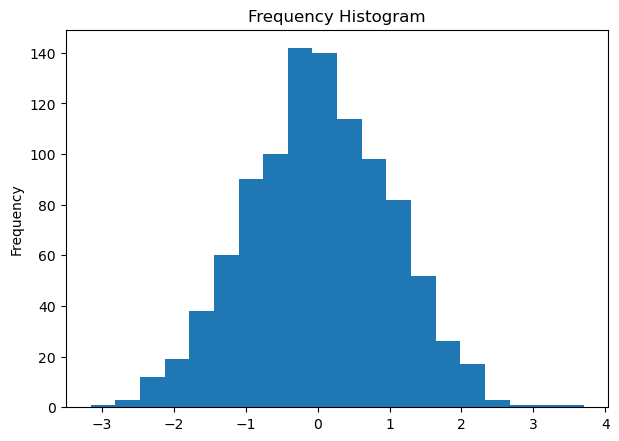

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(x,bins=20);
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');


# 3. Histogram grouped by categories in same plot


In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


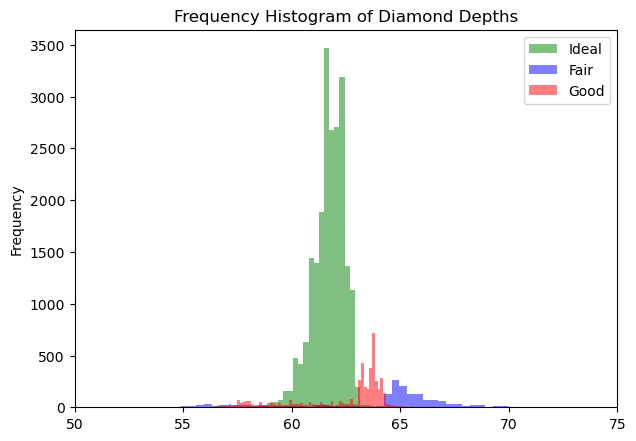

In [8]:
x1 = df.loc[df.cut=='Ideal', 'depth']
x2 = df.loc[df.cut=='Fair', 'depth']
x3 = df.loc[df.cut=='Good', 'depth']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.xlim(50,75)
plt.legend()

- Well, the distributions for the 3 differenct cuts are distinctively different. But since, the number of datapoints are more for Ideal cut, the it is more dominant.

- we can normalize it by setting density=True and stacked=True. By doing this the total area under each distribution becomes 1.

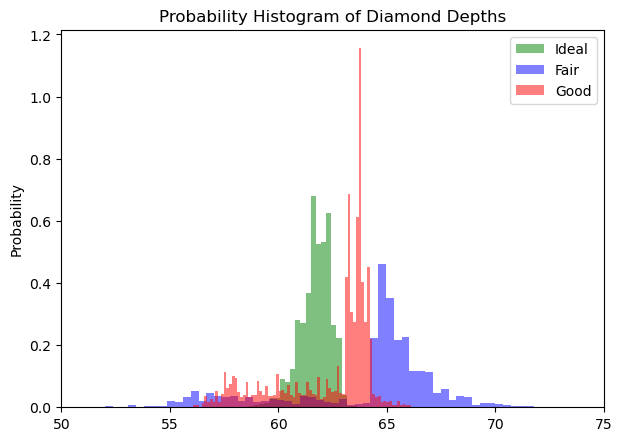

In [9]:
# Normalize
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

# Plot
plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Probability Histogram of Diamond Depths', ylabel='Probability')
plt.xlim(50,75)
plt.legend();

# 4. Histogram grouped by categories in separate subplots


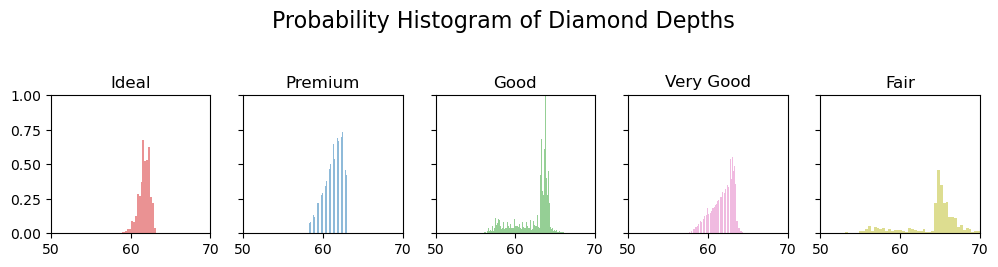

In [16]:
fig,axes=plt.subplots(1,5,figsize=(10,2.5),dpi=100,sharex=True,sharey=True)
colors= ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, cut) in enumerate(zip(axes.flatten(), df.cut.unique())):
    x = df.loc[df.cut==cut, 'depth']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(cut), color=colors[i])
    ax.set_title(cut)

plt.suptitle('Probability Histogram of Diamond Depths', y=1.05, size=16)
ax.set_xlim(50, 70)
ax.set_ylim(0, 1)
plt.tight_layout();

- enumerate() in Python: Get the element and index from a list
    
- zip() in Python: Get elements from multiple lists

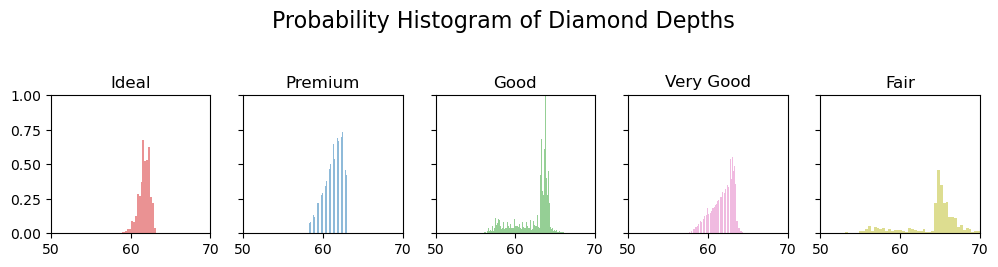

In [17]:
fig,axes=plt.subplots(1,5,figsize=(10,2.5),dpi=100,sharex=True,sharey=True)
colors= ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, cut) in enumerate(zip(axes, df.cut.unique())):
    x = df.loc[df.cut==cut, 'depth']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(cut), color=colors[i])
    ax.set_title(cut)

plt.suptitle('Probability Histogram of Diamond Depths', y=1.05, size=16)
ax.set_xlim(50, 70)
ax.set_ylim(0, 1)
plt.tight_layout();

# 5. Seaborn Histogram and Density Curve on the same plot


C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

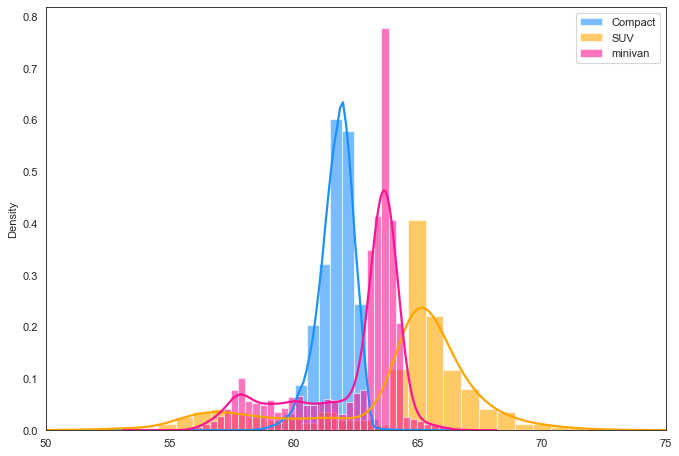

In [32]:
import seaborn as sns
sns.set_style('white')

x1=df.loc[df['cut']=='Ideal',['depth']]
x2=df.loc[df['cut']=='Fair',['depth']]
x3=df.loc[df['cut']=='Good',['depth']]

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)

sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
sns.distplot(x2, color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.xlim(50,75)
plt.legend();

# 6. Histogram and Density Curve in Facets


C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

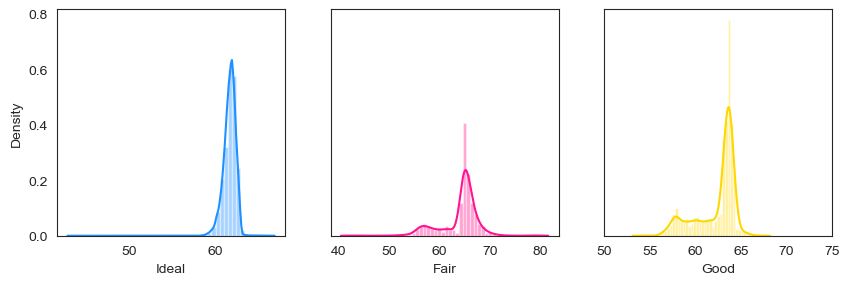

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Ideal')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Fair')
sns.distplot(x3 , color="gold", ax=axes[2], axlabel='Good')
plt.xlim(50,75);

# 7. Difference between a Histogram and a Bar Chart


A histogram is drawn on large arrays. It computes the frequency distribution on an array and makes a histogram out of it.

On the other hand, a bar chart is used when you have both X and Y given and there are limited number of data points that can be shown as bars.

In [34]:
# Groupby: cutwise median
price = df[['cut', 'price']].groupby('cut').median().round(2)
price

,price
cut,
Fair,3282.0
Good,3050.5
Ideal,1810.0
Premium,3185.0
Very Good,2648.0


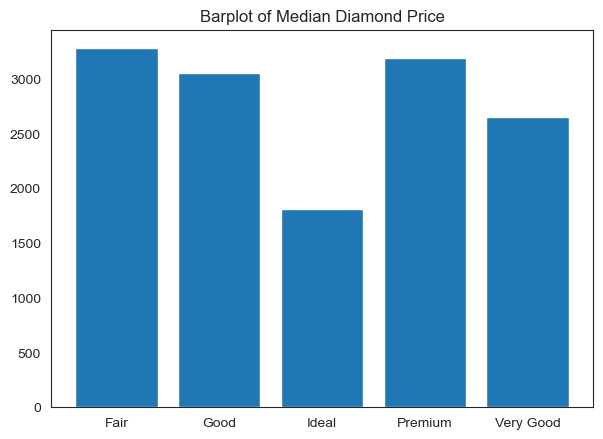

In [35]:
fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(price.index, height=price.price)
plt.title('Barplot of Median Diamond Price');

In [37]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
df['species'].uniqueque()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

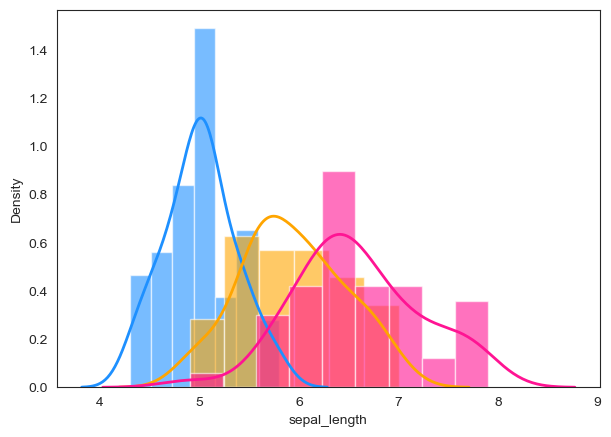

In [39]:

setosa=df.loc[df['species']=='setosa','sepal_length']
versicolor=df.loc[df['species']=='versicolor','sepal_length']
virginica=df.loc[df['species']=='virginica','sepal_length']

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})


sns.distplot(setosa,color="dodgerblue", label="setosa", **kwargs)
sns.distplot(versicolor, color="orange", label="versicolor", **kwargs)
sns.distplot(virginica, color="deeppink", label="virginica", **kwargs)

# Python Boxplot


- Boxplot is a chart that is used to visualize how a given data (variable) is distributed using quartiles. It shows the minimum, maximum, median, first quartile and third quartile in the data set

# What is a boxplot?

- Box plot is method to graphically show the spread of a numerical variable through quartiles.

- From the below image you can see what information we generally get from a box plot.

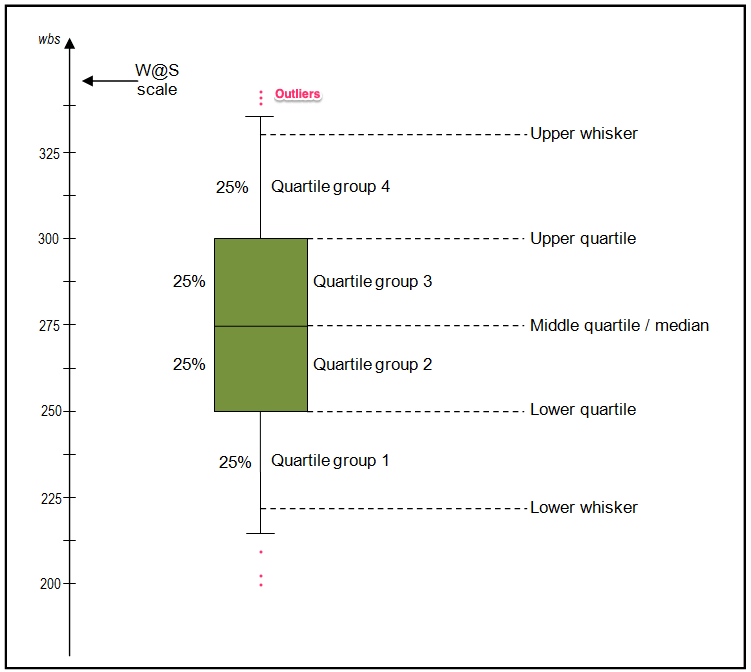

# How to interpret the box plot?

- The bottom of the (green) box is the 25% percentile and the top is the 75% percentile value of the data.

- So, essentially the box represents the middle 50% of all the datapoints which represents the core region when the data is situated. The height of the boxplot is also called the Inter Quartile Range (IQR), which mathematically is the difference between the 75th and 25th percentile values of the data.

- The thick line in the middle of the box represents the median. Whereas, the upper and lower whisker marks 1.5 times the IQR from the top (and bottom) of the box.

- But, why whiskers matter?

- Because, the points that lie outside the whiskers, that is, (1.5 x IQR) in both directions are generally considered as outliers.

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(50, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.486286,0.274245,0.822554
1,0.329809,0.148279,0.775524
2,0.660493,0.569253,0.183513
3,0.875975,0.155288,0.431290
4,0.456187,0.548176,0.824608


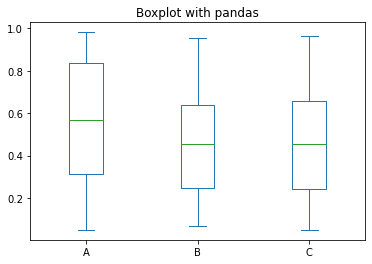

In [2]:
# Boxplot with Pandas
df.plot.box(title='Boxplot with pandas');

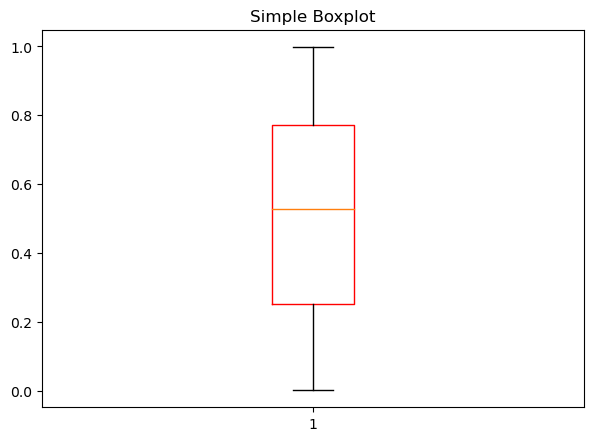

In [3]:
# Load package
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Creating dataset
df = pd.DataFrame(np.random.rand(500, 1), columns=['A'])

# plot
plt.boxplot(df['A'], boxprops=dict(color='red'))
plt.title('Simple Boxplot');

C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


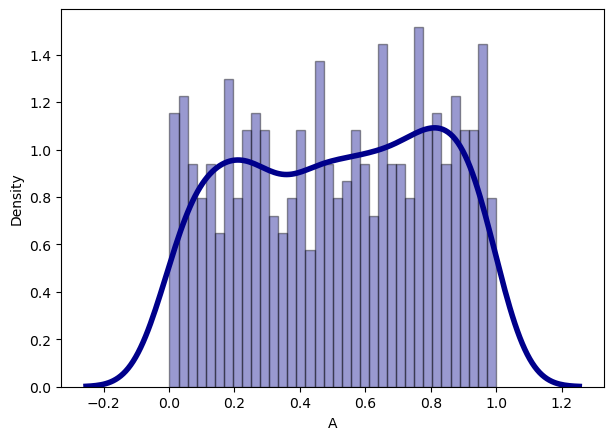

In [4]:
# Histogram and density
import seaborn as sns

sns.distplot(df['A'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

C:\Users\Jay Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


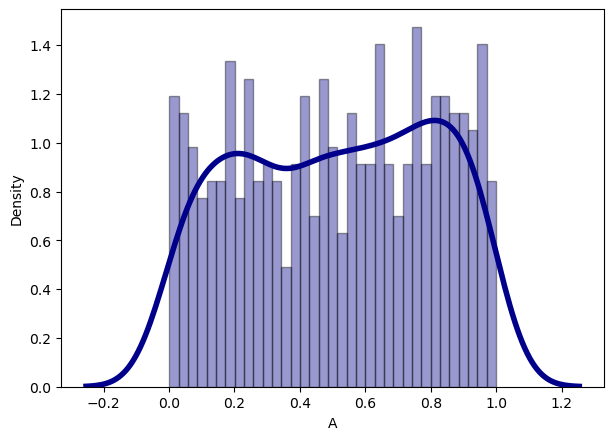

In [5]:
# Histogram and density
import seaborn as sns

sns.distplot(df['A'], hist=True, kde=True, 
             bins=35, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

# Notched Boxplot in matplotlib


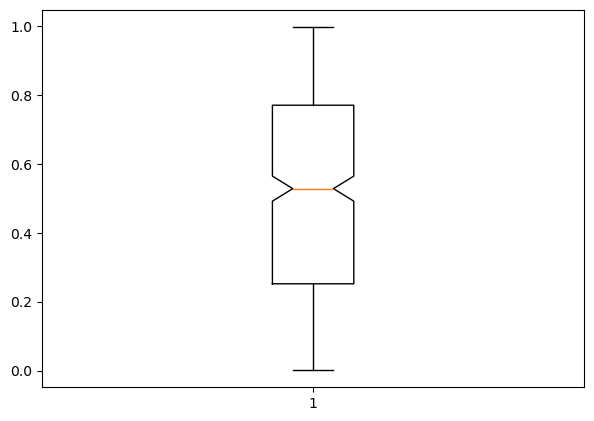

In [6]:
# Notched box plot
plt.boxplot(df['A'],notch=True);

# Plotting boxplot using seaborn


In [8]:
# Import data
df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


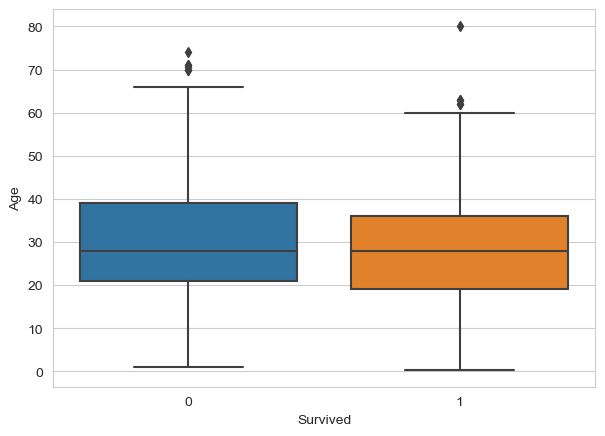

In [11]:

import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='Survived',y='Age',data=df)


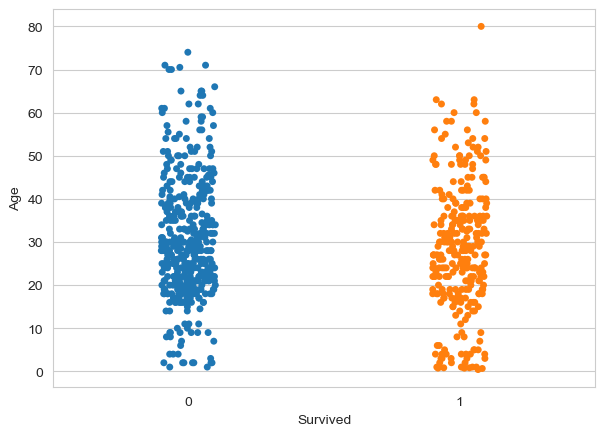

In [12]:
ax = sns.stripplot(x="Survived", y="Age",data=df)

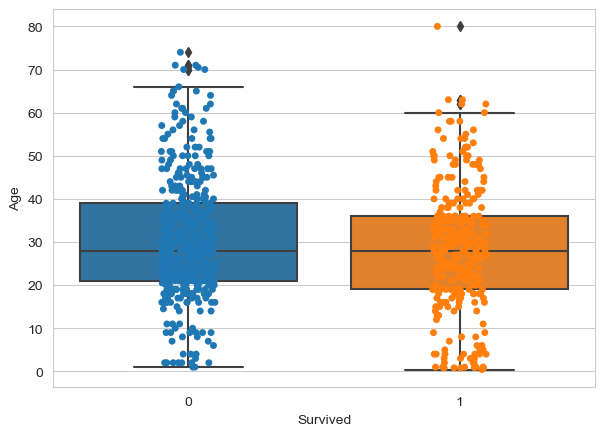

In [13]:

import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='Survived',y='Age',data=df)
ax = sns.stripplot(x="Survived", y="Age",data=df)

The stripplot() function adds the dots, which clearly gives more info on the distribution of points. In this case, the distribution appears to be fairly uniform

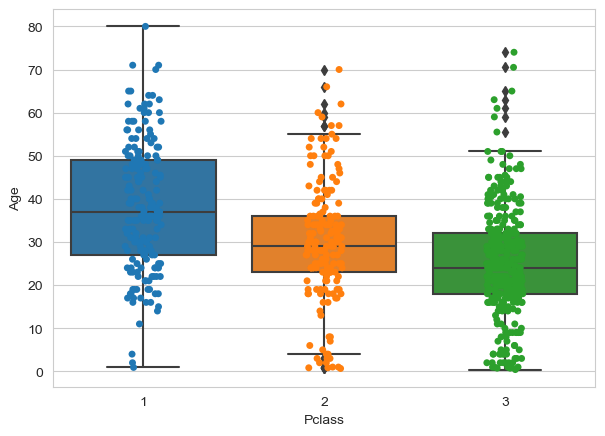

In [14]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Pclass',y='Age',data=df)
ax = sns.stripplot(x="Pclass", y="Age",data=df)

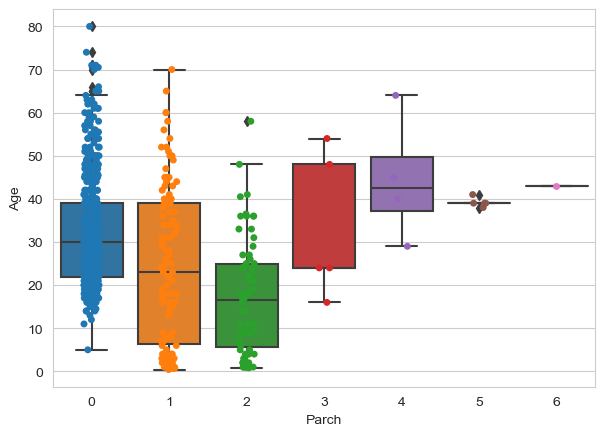

In [15]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Parch',y='Age',data=df)
ax = sns.stripplot(x="Parch", y="Age",data=df)


# Interpretation from the above graphs

- Using the graph you can see distribution of Age for Passenger Class – 1,2,3 and whether the person has survived or not.

- You can also see where the ‘cream of the data’ is situated by the location of the box. There are multiple outliers as well in ‘Age’ when split by Parch.

- These are characterised by points that lie outside the whiskers.

- From the above boxplot with the distribution, we can see that the median age for a person in first class is around 38 and for a person in second class is 29 and for a person in third class is around 24.

- It seems to imply that older people tend to travel in upper classes.

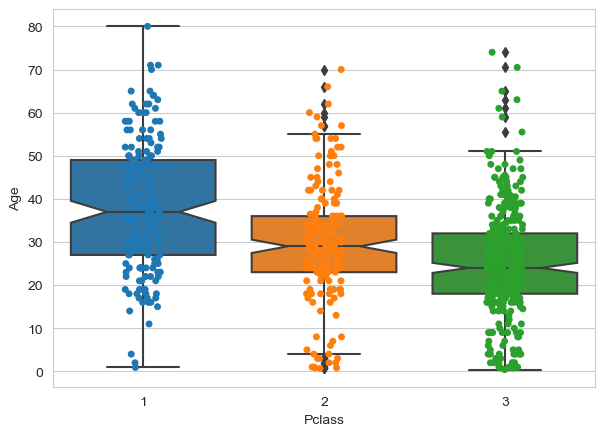

In [16]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Pclass',y='Age',data=df,notch=True)
ax = sns.stripplot(x="Pclass", y="Age",data=df)

- We can also say that since the notches of the boxplots do not coincide with each other, we can conclude with 95% confidence interval that the medians differ for all 3 classes.

# Violin Plot – A different kind of distribution finding graph

- The width of the violin is wider in places where there is more concentration of data points.



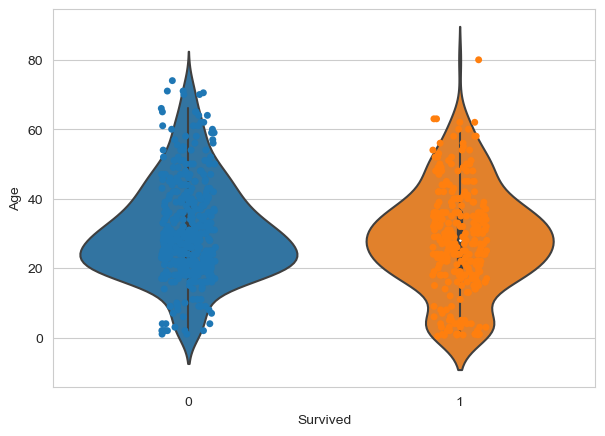

In [17]:
ax= sns.violinplot(x='Survived',y='Age',data=df)
ax = sns.stripplot(x="Survived", y="Age",data=df)